In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from PIL import Image

In [114]:
df_full = pd.read_csv('../../documentation/Data_Entry_2017_v2020.csv')

In [115]:
df_full.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [116]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


In [117]:
df_full = df_full.rename(columns={'Image Index': 'index','Finding Labels':'label','Follow-up #':'follow-up','Patient ID':'id','Patient Age':'age', \
    'Patient Gender':'gender','View Position':'view-position','OriginalImage[Width':'width','Height]':'height','OriginalImagePixelSpacing[x':'spacing-x','y]':'spacing-y'})

In [118]:
df_full.head(1)

,index,label,follow-up,id,age,gender,view-position,width,height,spacing-x,spacing-y
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143


In [119]:
df_full['gender'].value_counts()

gender
M    63340
F    48780
Name: count, dtype: int64

In [120]:
df_full.age.value_counts(bins=10).sort_index()

(-0.096, 9.5]     1538
(9.5, 19.0]       5508
(19.0, 28.5]     11519
(28.5, 38.0]     16085
(38.0, 47.5]     18852
(47.5, 57.0]     26753
(57.0, 66.5]     20385
(66.5, 76.0]      9398
(76.0, 85.5]      1836
(85.5, 95.0]       246
Name: count, dtype: int64

Negative age? It may be best to not include age as metadata.

In [121]:
df_full.label.nunique(), df_full['view-position'].nunique()

(836, 2)

In [122]:
df_full['view-position'].value_counts()

view-position
PA    67310
AP    44810
Name: count, dtype: int64

In anterior to posterior (AP) radiographs, the posterior structures are closer to the detector, and in posterior to anterior (PA) images, the anterior structures are closer to the detector.



In [123]:
# pd.set_option('display.max_rows', None)
df_full.label.value_counts()

label
No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: count, Length: 836, dtype: int64

In [124]:
import os

def count_files(directory):
    # Get list of all files and directories in the specified directory
    files = os.listdir(directory)
    
    # Count the number of files (excluding directories)
    file_count = sum(1 for file in files if os.path.isfile(os.path.join(directory, file)))
    
    return file_count

# Example usage:
directory_path = '../../data/images'  # Replace this with the path to your directory
num_files = count_files(directory_path)
print("Number of files in the directory:", num_files)

Number of files in the directory: 112120


In [125]:
labels = [
    'Atelectasis', 
    'Cardiomegaly', 
    'Effusion', 
    'Infiltration', 
    'Mass', 
    'Nodule', 
    'Pneumonia', 
    'Pneumothorax', 
    'Consolidation', 
    'Edema', 
    'Emphysema', 
    'Fibrosis', 
    'Pleural_Thickening',
    'Hernia']

In [126]:
df_full.describe()

,follow-up,id,age,width,height,spacing-x,spacing-y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.626365,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.602680,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,0.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,34.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [127]:
df_full.columns

Index(['index', 'label', 'follow-up', 'id', 'age', 'gender', 'view-position',
       'width', 'height', 'spacing-x', 'spacing-y'],
      dtype='object')

In [128]:
df_labels = df_full.drop(columns=['follow-up', 'id', 'age', 'gender', 'view-position',
       'width', 'height', 'spacing-x', 'spacing-y'])

In [129]:
df_labels['label'] = df_labels['label'].str.strip()
df_labels.to_csv('../../data/df_labels.csv',index=False)
label_dummies = df_labels['label'].str.get_dummies(sep='|')
df_labels = pd.concat([df_labels.drop(columns=['label']), label_dummies], axis=1)
df_labels = df_labels.rename(columns=lambda x: x.replace(' ', '_'))

In [130]:
df_labels.head()

,index,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No_Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [131]:
df_labels.columns

Index(['index', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No_Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

In [132]:
df_labels.to_csv('../../data/df_dummies.csv',index=False)

In [184]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def random_image_with_labels(folder_path, label_file, max_dimension=500, ext=['.jpg', '.jpeg', '.png', '.gif']):
    '''Random image from folder with associated labels'''

    # List all files in the folder
    files = os.listdir(folder_path)

    # Filter only image files with desired extension
    image_files = [file for file in files if file.endswith(tuple(ext))]

    # Check if there are any image files in the folder
    if not image_files:
        print("No image files found in the directory.")
        return None, None
    else:
        # Choose a random image file
        random_image_file = random.choice(image_files)
        random_image_path = os.path.join(folder_path, random_image_file)
        
        # Load the image using PIL (Python Imaging Library)
        img = Image.open(random_image_path)
        
        # Resize the image to a smaller size
        width, height = img.size
        if width > max_dimension or height > max_dimension:
            scale_factor = max_dimension / max(width, height)
            new_width = int(width * scale_factor)
            new_height = int(height * scale_factor)
            img = img.resize((new_width, new_height))
        
        # Extract filename with extension
        filename_with_ext = random_image_file
        filename_without_ext = os.path.splitext(random_image_file)[0]
        
        # Load labels from CSV file
        labels_df = pd.read_csv(label_file)
        
        # Filter labels for the random image
        image_labels_ext = labels_df[labels_df['index'] == filename_with_ext]['label'].values
        image_labels = labels_df[labels_df['index'] == filename_without_ext]['label'].values
        
        # Print filename and labels
        print("Filename:", filename_with_ext)
        print("Labels for the random image (ext):", image_labels_ext)
        print("Labels for the random image:", image_labels_ext)
        
        # Display the image
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show()
        
        return img, filename_with_ext, image_labels


Filename: 00012834_047.png
Labels for the random image (ext): ['Edema|Effusion']
Labels for the random image: ['Edema|Effusion']


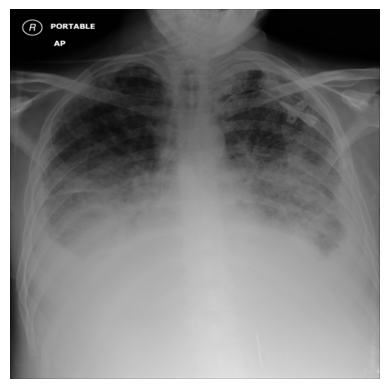

(<PIL.Image.Image image mode=L size=500x500>,
 '00012834_047.png',
 array([], dtype=object))

In [190]:
random_image_with_labels(folder_path='../../data/images/', label_file='../../data/df_labels.csv')